In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
methods = ['tdtse', 'dtse', 'random', 'static-min', 'static-mid', 'static-max']

In [3]:
files = [x + '.csv' for x in methods]

In [4]:
def read_queue(fp):
    with open(fp, newline='') as f:
        reader = csv.reader(f)
        data = []
        for line in reader:
            data.append(line[-1])

        data = [int(x) for x in data]

        return data

In [5]:
def read_tt(fp):
    with open(fp, newline='') as f:
        reader = csv.reader(f)
        data = []
        for line in reader:
            data = line[1:]

        data = [int(x) for x in data]

        return data

In [6]:
queue_metrics = [read_queue('queue-metric/' + x) for x in files]

In [7]:
tt_metrics = [read_tt('travel-time-metric/' + x) for x in files]

In [8]:
queue_ave = [np.sum(x)/len(x) for x in queue_metrics]
print(queue_ave)

In [12]:
tt_ave = [np.sum(x)/len(x) for x in tt_metrics]
print(tt_ave)

[12.36464, 12.59548, 16.18992, 14.68944, 36.6336, 38.89528]

In [9]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Model')

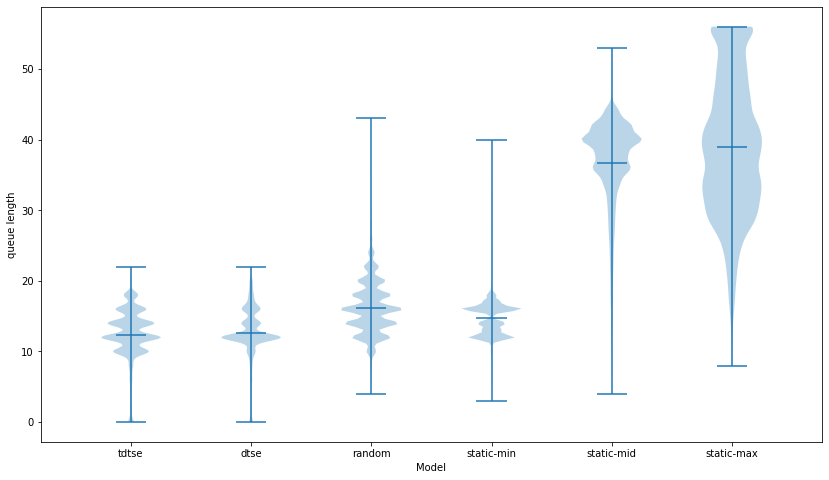

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.violinplot(queue_metrics, showmeans=True)
set_axis_style(ax, methods)
ax.set_ylabel('queue length')
plt.show()

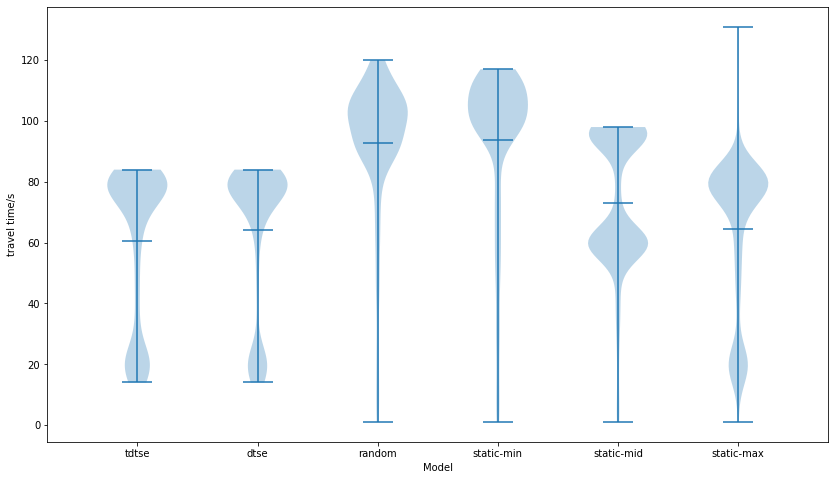

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.violinplot(tt_metrics, showmeans=True)
set_axis_style(ax, methods)
ax.set_ylabel('travel time/s')
plt.show()